In [1]:
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.7.0+cpu


'cpu'


### Overfitting prevention - 

`Get more data`	Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.

`Simplify your model`	If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.

`Use data augmentation`	Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.

`Use transfer learning`	Transfer learning involves leveraging the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

`Use dropout layers`	Dropout layers randomly remove connections between hidden layers in neural networks, effectively simplifying a model but also making the remaining connections better. See torch.nn.Dropout() for more.

`Use learning rate decay`	The idea here is to slowly decrease the learning rate as a model trains. This is akin to reaching for a coin at the back of a couch. The closer you get, the smaller your steps. The same with the learning rate, the closer you get to convergence, the smaller you'll want your weight updates to be.

`Use early stopping`	Early stopping stops model training before it begins to overfit. As in, say the model's loss has stopped decreasing for the past 10 epochs (this number is arbitrary), you may want to stop the model training here and go with the model weights that had the lowest loss (10 epochs prior).

https://www.learnpytorch.io/04_pytorch_custom_datasets/

### Underfitting Prevention

`Add more layers/units to your model`	If your model is underfitting, it may not have enough capability to learn the required patterns/weights/representations of the data to be predictive. One way to add more predictive power to your model is to increase the number of hidden layers/units within those layers.

`Tweak the learning rate`	Perhaps your model's learning rate is too high to begin with. And it's trying to update its weights each epoch too much, in turn not learning anything. In this case, you might lower the learning rate and see what happens.

`Use transfer learning`	Transfer learning is capable of preventing overfitting and underfitting. It involves using the patterns from a previously working model and adjusting them to your own problem.

`Train for longer`	Sometimes a model just needs more time to learn representations of data. If you find in your smaller experiments your model isn't learning anything, perhaps leaving it train for a more epochs may result in better performance.

`Use less regularization`	Perhaps your model is underfitting because you're trying to prevent overfitting too much. Holding back on regularization techniques can help your model fit the data better.

https://www.learnpytorch.io/04_pytorch_custom_datasets/

In [2]:
#loading the data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory exists.


In [3]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [4]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [5]:
# setup train and testing path

train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [6]:
#visualize the data
import random
import matplotlib.pyplot as plt
from PIL import Image

random.seed(42)

#get all the image paths(any combintation)
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list


[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jp

Image class: sushi
Image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image shape: (512, 408)
Image Height: 408
Image Width: 512


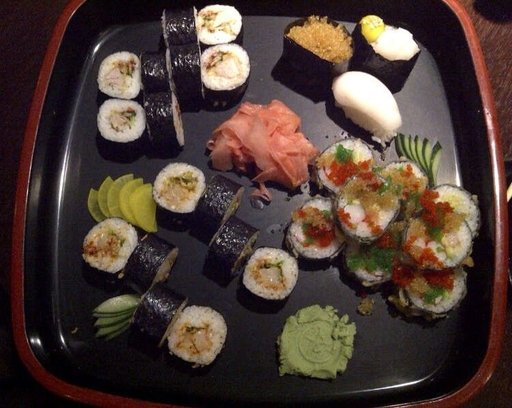

In [7]:
# get random image path
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)
print(f"Image class: {image_class}")
print(f"Image path: {random_image_path}")
print(f"Image shape: {img.size}")
print(f"Image Height: {img.height}")
print(f"Image Width: {img.width}")

img

In [8]:
# visualize the image using matplotlib

import numpy as np
import matplotlib.pyplot as plt

image_as_array = np.array(img)
image_as_array

array([[[33, 13, 15],
        [30, 10, 12],
        [30, 10, 12],
        ...,
        [23, 14, 19],
        [21, 12, 17],
        [20, 11, 16]],

       [[35, 15, 17],
        [32, 12, 14],
        [31, 11, 13],
        ...,
        [21, 12, 17],
        [19, 10, 15],
        [19, 10, 15]],

       [[34, 15, 17],
        [31, 12, 14],
        [30, 11, 13],
        ...,
        [19,  9, 17],
        [18,  8, 16],
        [18,  8, 16]],

       ...,

       [[11,  6, 12],
        [11,  6, 12],
        [11,  6, 12],
        ...,
        [33, 19, 18],
        [33, 19, 19],
        [31, 17, 17]],

       [[ 8,  3,  9],
        [ 9,  4, 10],
        [ 9,  4, 10],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [27, 11, 11]],

       [[ 4,  0,  5],
        [ 5,  0,  6],
        [ 6,  1,  7],
        ...,
        [36, 21, 18],
        [32, 16, 16],
        [25,  9,  9]]], shape=(408, 512, 3), dtype=uint8)

(np.float64(-0.5), np.float64(511.5), np.float64(407.5), np.float64(-0.5))

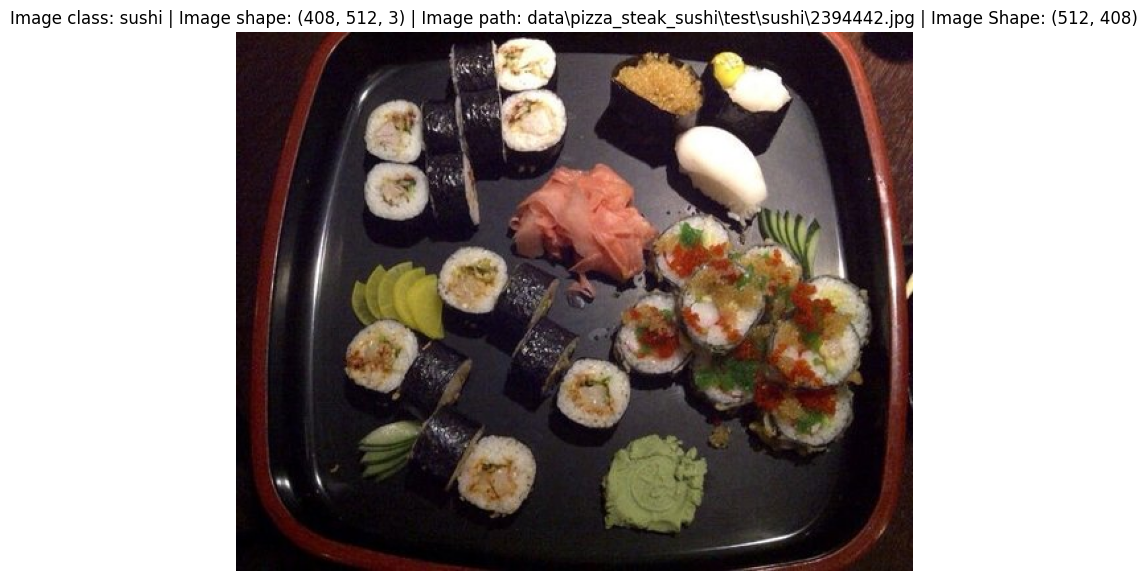

In [9]:
plt. figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(f"Image class: {image_class} | Image shape: {image_as_array.shape} | Image path: {random_image_path} | Image Shape: {img.size}")
plt.axis(False)

In [10]:
# transform data with transforms
from torchvision import transforms, datasets

from torch.utils.data import DataLoader

data_transform = transforms.Compose(
    [
        transforms.Resize(size=(64,64)), # resize the image to 64x64 pixels
        transforms.RandomRotation(degrees=30), # randomly rotate the image by 30 degrees
        transforms.RandomHorizontalFlip(p=0.5), # randomly flip the image horizontally with 50% probability
        transforms.ToTensor(), # convert the image to a tensor

    ]
)

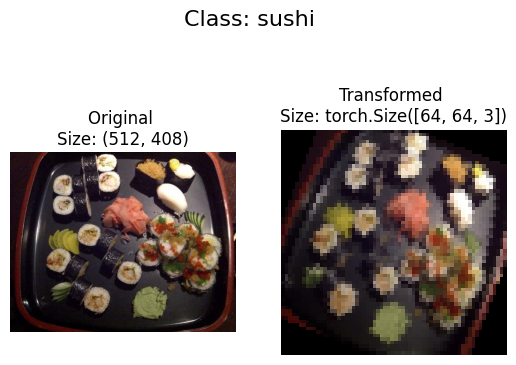

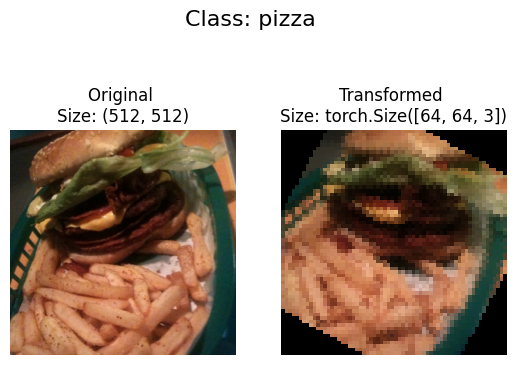

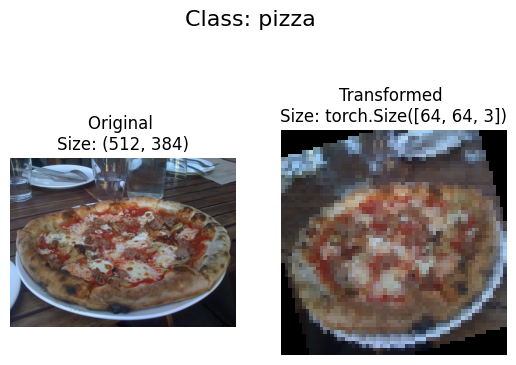

In [11]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform, 
                        n=3)

In [12]:
from torchvision.datasets import ImageFolder
# Create training and test datasets
train_data = ImageFolder(root=train_dir, transform=data_transform)
test_data = ImageFolder(root=test_dir, transform=data_transform)
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [13]:
class_name = train_data.classes
class_name

['pizza', 'steak', 'sushi']

In [14]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [15]:
len(train_data), len(test_data) 

(225, 75)

In [16]:
from torch.utils.data import DataLoader
# Create training and test dataloaders

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()


train_dataloader = DataLoader(
    dataset = train_data,
    batch_size=32,
    num_workers=NUM_WORKERS,
    shuffle=True,
)

test_dataloader =DataLoader(
    dataset = test_data,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False,

)

print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")

train_dataloader, test_dataloader



Creating DataLoader's with batch size 32 and 4 workers.


(<torch.utils.data.dataloader.DataLoader at 0x1a251172890>,
 <torch.utils.data.dataloader.DataLoader at 0x1a250e82f50>)

In [17]:
#num of batches in train and test dataloaders
len(train_dataloader), len(test_dataloader)

(8, 3)

In [18]:
#ccreating model

class TinyVGG(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        # Convolutional block 1
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            )
        # Convolutional block 2
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=1,
            ),
            nn.ReLU(),
            nn.Conv2d(
                    in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1,
                ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),           
            
            )
        
        self.classifier= nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16, out_features=output_shape),


        )

    def forward(self, x):
        x= self.conv_block_1(x)
        print(f"Shape after conv_block_1: {x.shape}")
        x= self.conv_block_2(x)
        print(f"Shape after conv_block_2: {x.shape}")
        x= self.classifier(x)
        print(f"Shape after classifier: {x.shape}")
        return x


In [19]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [20]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
 
    # Send data to target device
    X,y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    

    # 3. Optimizer zero grad 
    optimizer.zero_grad()
    

    # 4. Loss backward 
    loss.backward()
    

    # 5. Optimizer step
    optimizer.step()
    

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred_class)
   

  # Adjust metrics to get average loss and average accuracy per batch
    train_loss /= len(dataloader)   
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [21]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
  
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
    
      # Send data to target device
      X,y = X.to(device), y.to(device)
      

      # 1. Forward pass
      y_pred = model(X)
      

      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_pred, y)
      test_loss += loss.item()


      # Calculate and accumulate accuracy
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      test_acc += (y_pred_class == y).sum().item()/len(y_pred_class)

    
  # Adjust metrics to get average loss and accuracy per batch
  test_loss /= len(dataloader)
  test_acc /= len(dataloader)
  return test_loss, test_acc


In [22]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

d:\GitHub\Pytorch\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), 
                             lr=0.001)


results_0 = train(model=model_0,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     optimizer=optimizer,
                     loss_fn=loss_fn,
                     epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 20%|██        | 1/5 [00:47<03:08, 47.14s/it]

Epoch: 1 | train_loss: 0.1379 | train_acc: 0.0273 | test_loss: 1.0656 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 40%|████      | 2/5 [01:18<01:53, 37.74s/it]

Epoch: 2 | train_loss: 0.1362 | train_acc: 0.0508 | test_loss: 1.0428 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 60%|██████    | 3/5 [01:58<01:17, 38.79s/it]

Epoch: 3 | train_loss: 0.1382 | train_acc: 0.0391 | test_loss: 1.0368 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 80%|████████  | 4/5 [02:36<00:38, 38.63s/it]

Epoch: 4 | train_loss: 0.1439 | train_acc: 0.0312 | test_loss: 1.0439 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


100%|██████████| 5/5 [03:06<00:00, 37.36s/it]

Epoch: 5 | train_loss: 0.1372 | train_acc: 0.0430 | test_loss: 1.0533 | test_acc: 0.5417


In [24]:

# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), 
                             lr=0.001)

results_1 = train(model=model_0,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     optimizer=optimizer,
                     loss_fn=loss_fn,
                     epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


  5%|▌         | 1/20 [00:33<10:31, 33.26s/it]

Epoch: 1 | train_loss: 0.1341 | train_acc: 0.0625 | test_loss: 1.0263 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 10%|█         | 2/20 [01:04<09:37, 32.11s/it]

Epoch: 2 | train_loss: 0.1325 | train_acc: 0.0508 | test_loss: 1.0167 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 15%|█▌        | 3/20 [01:36<09:06, 32.15s/it]

Epoch: 3 | train_loss: 0.1395 | train_acc: 0.0391 | test_loss: 1.0226 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 20%|██        | 4/20 [02:02<07:55, 29.70s/it]

Epoch: 4 | train_loss: 0.1494 | train_acc: 0.0312 | test_loss: 1.0339 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 25%|██▌       | 5/20 [02:40<08:08, 32.59s/it]

Epoch: 5 | train_loss: 0.1378 | train_acc: 0.0430 | test_loss: 1.0490 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 30%|███       | 6/20 [03:14<07:42, 33.03s/it]

Epoch: 6 | train_loss: 0.1469 | train_acc: 0.0273 | test_loss: 1.0656 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 35%|███▌      | 7/20 [03:48<07:16, 33.56s/it]

Epoch: 7 | train_loss: 0.1413 | train_acc: 0.0352 | test_loss: 1.0836 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 40%|████      | 8/20 [04:29<07:09, 35.80s/it]

Epoch: 8 | train_loss: 0.1384 | train_acc: 0.0391 | test_loss: 1.1020 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 45%|████▌     | 9/20 [05:08<06:45, 36.86s/it]

Epoch: 9 | train_loss: 0.1371 | train_acc: 0.0469 | test_loss: 1.1232 | test_acc: 0.2708
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 50%|█████     | 10/20 [05:41<05:56, 35.67s/it]

Epoch: 10 | train_loss: 0.1375 | train_acc: 0.0508 | test_loss: 1.1408 | test_acc: 0.1979
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 55%|█████▌    | 11/20 [06:16<05:18, 35.35s/it]

Epoch: 11 | train_loss: 0.1367 | train_acc: 0.0352 | test_loss: 1.1572 | test_acc: 0.1979
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 60%|██████    | 12/20 [06:48<04:34, 34.37s/it]

Epoch: 12 | train_loss: 0.1409 | train_acc: 0.0234 | test_loss: 1.1654 | test_acc: 0.1979
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 65%|██████▌   | 13/20 [07:25<04:06, 35.20s/it]

Epoch: 13 | train_loss: 0.1449 | train_acc: 0.0273 | test_loss: 1.1618 | test_acc: 0.1979
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 70%|███████   | 14/20 [07:53<03:18, 33.04s/it]

Epoch: 14 | train_loss: 0.1351 | train_acc: 0.0547 | test_loss: 1.1601 | test_acc: 0.1979
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 75%|███████▌  | 15/20 [08:22<02:38, 31.77s/it]

Epoch: 15 | train_loss: 0.1362 | train_acc: 0.0352 | test_loss: 1.1591 | test_acc: 0.2292
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 80%|████████  | 16/20 [09:03<02:18, 34.61s/it]

Epoch: 16 | train_loss: 0.1349 | train_acc: 0.0781 | test_loss: 1.1590 | test_acc: 0.2812
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 85%|████████▌ | 17/20 [09:33<01:39, 33.31s/it]

Epoch: 17 | train_loss: 0.1339 | train_acc: 0.0703 | test_loss: 1.1619 | test_acc: 0.3021
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 90%|█████████ | 18/20 [10:20<01:14, 37.42s/it]

Epoch: 18 | train_loss: 0.1381 | train_acc: 0.0469 | test_loss: 1.1622 | test_acc: 0.2917
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 95%|█████████▌| 19/20 [11:00<00:38, 38.07s/it]

Epoch: 19 | train_loss: 0.1366 | train_acc: 0.0625 | test_loss: 1.1614 | test_acc: 0.2708
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


100%|██████████| 20/20 [11:38<00:00, 34.93s/it]

Epoch: 20 | train_loss: 0.1374 | train_acc: 0.0508 | test_loss: 1.1611 | test_acc: 0.2604


In [25]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), 
                             lr=0.001)

results_2 = train(model=model_0,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     optimizer=optimizer,
                     loss_fn=loss_fn,
                     epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


  2%|▏         | 1/50 [00:36<29:42, 36.39s/it]

Epoch: 1 | train_loss: 0.1436 | train_acc: 0.0312 | test_loss: 1.1230 | test_acc: 0.2708
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


  4%|▍         | 2/50 [01:25<34:53, 43.61s/it]

Epoch: 2 | train_loss: 0.1371 | train_acc: 0.0508 | test_loss: 1.1018 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


  6%|▌         | 3/50 [02:01<31:32, 40.28s/it]

Epoch: 3 | train_loss: 0.1353 | train_acc: 0.0547 | test_loss: 1.0894 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


  8%|▊         | 4/50 [02:30<27:37, 36.04s/it]

Epoch: 4 | train_loss: 0.1369 | train_acc: 0.0430 | test_loss: 1.0821 | test_acc: 0.2708
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 10%|█         | 5/50 [03:13<28:53, 38.52s/it]

Epoch: 5 | train_loss: 0.1352 | train_acc: 0.0430 | test_loss: 1.0793 | test_acc: 0.2500
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 12%|█▏        | 6/50 [03:55<29:01, 39.58s/it]

Epoch: 6 | train_loss: 0.1386 | train_acc: 0.0391 | test_loss: 1.0772 | test_acc: 0.2708
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 14%|█▍        | 7/50 [04:32<27:51, 38.86s/it]

Epoch: 7 | train_loss: 0.1384 | train_acc: 0.0430 | test_loss: 1.0773 | test_acc: 0.2907
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 16%|█▌        | 8/50 [05:08<26:34, 37.96s/it]

Epoch: 8 | train_loss: 0.1364 | train_acc: 0.0391 | test_loss: 1.0780 | test_acc: 0.3002
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 18%|█▊        | 9/50 [05:43<25:10, 36.84s/it]

Epoch: 9 | train_loss: 0.1359 | train_acc: 0.0508 | test_loss: 1.0807 | test_acc: 0.3106
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 20%|██        | 10/50 [06:11<22:46, 34.16s/it]

Epoch: 10 | train_loss: 0.1341 | train_acc: 0.0508 | test_loss: 1.0833 | test_acc: 0.3210
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 22%|██▏       | 11/50 [06:40<21:10, 32.58s/it]

Epoch: 11 | train_loss: 0.1317 | train_acc: 0.0508 | test_loss: 1.0870 | test_acc: 0.3419
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 24%|██▍       | 12/50 [07:19<21:56, 34.64s/it]

Epoch: 12 | train_loss: 0.1329 | train_acc: 0.0625 | test_loss: 1.0889 | test_acc: 0.2708
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 26%|██▌       | 13/50 [07:47<20:01, 32.46s/it]

Epoch: 13 | train_loss: 0.1344 | train_acc: 0.0391 | test_loss: 1.0840 | test_acc: 0.2812
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 28%|██▊       | 14/50 [08:44<23:54, 39.85s/it]

Epoch: 14 | train_loss: 0.1360 | train_acc: 0.0391 | test_loss: 1.0845 | test_acc: 0.3220
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 30%|███       | 15/50 [09:27<23:48, 40.81s/it]

Epoch: 15 | train_loss: 0.1277 | train_acc: 0.0703 | test_loss: 1.0831 | test_acc: 0.3116
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 32%|███▏      | 16/50 [10:04<22:31, 39.75s/it]

Epoch: 16 | train_loss: 0.1324 | train_acc: 0.0469 | test_loss: 1.0844 | test_acc: 0.3220
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 34%|███▍      | 17/50 [10:43<21:43, 39.51s/it]

Epoch: 17 | train_loss: 0.1282 | train_acc: 0.0625 | test_loss: 1.0893 | test_acc: 0.3324
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 36%|███▌      | 18/50 [11:34<22:52, 42.88s/it]

Epoch: 18 | train_loss: 0.1310 | train_acc: 0.0508 | test_loss: 1.0921 | test_acc: 0.3324
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 38%|███▊      | 19/50 [12:10<21:07, 40.89s/it]

Epoch: 19 | train_loss: 0.1275 | train_acc: 0.0625 | test_loss: 1.0936 | test_acc: 0.3220
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 40%|████      | 20/50 [12:41<19:02, 38.10s/it]

Epoch: 20 | train_loss: 0.1271 | train_acc: 0.0586 | test_loss: 1.1012 | test_acc: 0.3324
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 42%|████▏     | 21/50 [13:09<16:52, 34.91s/it]

Epoch: 21 | train_loss: 0.1345 | train_acc: 0.0430 | test_loss: 1.0939 | test_acc: 0.3419
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 44%|████▍     | 22/50 [13:35<15:06, 32.37s/it]

Epoch: 22 | train_loss: 0.1267 | train_acc: 0.0625 | test_loss: 1.0907 | test_acc: 0.3314
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 46%|████▌     | 23/50 [14:02<13:48, 30.67s/it]

Epoch: 23 | train_loss: 0.1279 | train_acc: 0.0664 | test_loss: 1.0945 | test_acc: 0.3314
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 48%|████▊     | 24/50 [14:28<12:36, 29.11s/it]

Epoch: 24 | train_loss: 0.1293 | train_acc: 0.0586 | test_loss: 1.0823 | test_acc: 0.3002
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 50%|█████     | 25/50 [15:06<13:20, 32.01s/it]

Epoch: 25 | train_loss: 0.1262 | train_acc: 0.0703 | test_loss: 1.0797 | test_acc: 0.3419
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 52%|█████▏    | 26/50 [15:32<12:04, 30.20s/it]

Epoch: 26 | train_loss: 0.1245 | train_acc: 0.0781 | test_loss: 1.0639 | test_acc: 0.3305
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 54%|█████▍    | 27/50 [16:01<11:22, 29.66s/it]

Epoch: 27 | train_loss: 0.1193 | train_acc: 0.0820 | test_loss: 1.0631 | test_acc: 0.3106
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 56%|█████▌    | 28/50 [16:28<10:38, 29.01s/it]

Epoch: 28 | train_loss: 0.1184 | train_acc: 0.0742 | test_loss: 1.0522 | test_acc: 0.3002
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 58%|█████▊    | 29/50 [16:56<10:04, 28.78s/it]

Epoch: 29 | train_loss: 0.1146 | train_acc: 0.0820 | test_loss: 1.0612 | test_acc: 0.3627
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 60%|██████    | 30/50 [17:22<09:18, 27.90s/it]

Epoch: 30 | train_loss: 0.1182 | train_acc: 0.0586 | test_loss: 1.0706 | test_acc: 0.3523
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 62%|██████▏   | 31/50 [18:04<10:06, 31.93s/it]

Epoch: 31 | train_loss: 0.1011 | train_acc: 0.0938 | test_loss: 1.0731 | test_acc: 0.3731
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 64%|██████▍   | 32/50 [18:32<09:17, 30.99s/it]

Epoch: 32 | train_loss: 0.1251 | train_acc: 0.0547 | test_loss: 1.0573 | test_acc: 0.3627
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 66%|██████▌   | 33/50 [19:00<08:28, 29.92s/it]

Epoch: 33 | train_loss: 0.1195 | train_acc: 0.0586 | test_loss: 1.0302 | test_acc: 0.4025
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 68%|██████▊   | 34/50 [19:25<07:36, 28.53s/it]

Epoch: 34 | train_loss: 0.1155 | train_acc: 0.0703 | test_loss: 1.0353 | test_acc: 0.3617
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 70%|███████   | 35/50 [20:04<07:52, 31.52s/it]

Epoch: 35 | train_loss: 0.1086 | train_acc: 0.0703 | test_loss: 1.0383 | test_acc: 0.3816
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 72%|███████▏  | 36/50 [20:28<06:52, 29.50s/it]

Epoch: 36 | train_loss: 0.1143 | train_acc: 0.0781 | test_loss: 1.0380 | test_acc: 0.4025
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 74%|███████▍  | 37/50 [20:54<06:06, 28.17s/it]

Epoch: 37 | train_loss: 0.1050 | train_acc: 0.0820 | test_loss: 1.0547 | test_acc: 0.4744
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 76%|███████▌  | 38/50 [21:20<05:31, 27.61s/it]

Epoch: 38 | train_loss: 0.1117 | train_acc: 0.0703 | test_loss: 1.0585 | test_acc: 0.3920
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 78%|███████▊  | 39/50 [21:44<04:53, 26.70s/it]

Epoch: 39 | train_loss: 0.1294 | train_acc: 0.0703 | test_loss: 1.0656 | test_acc: 0.3617
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 80%|████████  | 40/50 [22:11<04:26, 26.67s/it]

Epoch: 40 | train_loss: 0.0892 | train_acc: 0.0938 | test_loss: 1.1335 | test_acc: 0.3523
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 82%|████████▏ | 41/50 [22:35<03:53, 25.97s/it]

Epoch: 41 | train_loss: 0.1314 | train_acc: 0.0586 | test_loss: 1.1398 | test_acc: 0.3523
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 84%|████████▍ | 42/50 [23:02<03:28, 26.10s/it]

Epoch: 42 | train_loss: 0.0999 | train_acc: 0.0742 | test_loss: 1.1218 | test_acc: 0.3210
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 86%|████████▌ | 43/50 [23:27<03:00, 25.76s/it]

Epoch: 43 | train_loss: 0.0922 | train_acc: 0.0859 | test_loss: 1.0814 | test_acc: 0.3409
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 88%|████████▊ | 44/50 [23:52<02:33, 25.64s/it]

Epoch: 44 | train_loss: 0.1102 | train_acc: 0.0625 | test_loss: 1.0257 | test_acc: 0.4337
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 90%|█████████ | 45/50 [24:24<02:18, 27.67s/it]

Epoch: 45 | train_loss: 0.1190 | train_acc: 0.0703 | test_loss: 1.0638 | test_acc: 0.4744
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 92%|█████████▏| 46/50 [24:50<01:47, 26.90s/it]

Epoch: 46 | train_loss: 0.1104 | train_acc: 0.0820 | test_loss: 1.0601 | test_acc: 0.4943
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 94%|█████████▍| 47/50 [25:18<01:22, 27.42s/it]

Epoch: 47 | train_loss: 0.1285 | train_acc: 0.0664 | test_loss: 0.9717 | test_acc: 0.5246
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 96%|█████████▌| 48/50 [25:44<00:54, 27.05s/it]

Epoch: 48 | train_loss: 0.1191 | train_acc: 0.0742 | test_loss: 0.9689 | test_acc: 0.5152
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


 98%|█████████▊| 49/50 [26:13<00:27, 27.46s/it]

Epoch: 49 | train_loss: 0.1053 | train_acc: 0.0781 | test_loss: 0.9518 | test_acc: 0.5152
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 10, 32, 32])
Shape after conv_block_2: torch.Size([32, 10, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 10, 32, 32])
Shape after conv_block_2: torch.Size([11, 10, 16, 16])
Shape after classifier: torch.Size([11, 3])


100%|██████████| 50/50 [26:43<00:00, 32.07s/it]

Epoch: 50 | train_loss: 0.1030 | train_acc: 0.0820 | test_loss: 0.9598 | test_acc: 0.5256


Double the number of hidden units in your model and train it for 20 epochs

In [26]:
torch.manual_seed(42)
model_1 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=20, 
                  output_shape=len(train_data.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=5120, out_features=3, bias=True)
  )
)

In [29]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), 
                             lr=0.001)

results_3 = train(model=model_1,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     optimizer=optimizer,
                     loss_fn=loss_fn,
                     epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


  5%|▌         | 1/20 [00:45<14:28, 45.72s/it]

Epoch: 1 | train_loss: 0.1371 | train_acc: 0.0312 | test_loss: 1.0819 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 10%|█         | 2/20 [01:23<12:21, 41.21s/it]

Epoch: 2 | train_loss: 0.1355 | train_acc: 0.0508 | test_loss: 1.0690 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 15%|█▌        | 3/20 [02:00<11:02, 39.00s/it]

Epoch: 3 | train_loss: 0.1365 | train_acc: 0.0391 | test_loss: 1.0609 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 20%|██        | 4/20 [02:33<09:46, 36.65s/it]

Epoch: 4 | train_loss: 0.1413 | train_acc: 0.0312 | test_loss: 1.0647 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 25%|██▌       | 5/20 [03:12<09:21, 37.47s/it]

Epoch: 5 | train_loss: 0.1365 | train_acc: 0.0430 | test_loss: 1.0685 | test_acc: 0.5417
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 30%|███       | 6/20 [03:51<08:51, 37.98s/it]

Epoch: 6 | train_loss: 0.1422 | train_acc: 0.0273 | test_loss: 1.0751 | test_acc: 0.5028
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 35%|███▌      | 7/20 [04:30<08:21, 38.55s/it]

Epoch: 7 | train_loss: 0.1395 | train_acc: 0.0586 | test_loss: 1.0818 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 40%|████      | 8/20 [05:01<07:12, 36.00s/it]

Epoch: 8 | train_loss: 0.1385 | train_acc: 0.0391 | test_loss: 1.0883 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 45%|████▌     | 9/20 [05:30<06:11, 33.79s/it]

Epoch: 9 | train_loss: 0.1381 | train_acc: 0.0469 | test_loss: 1.0954 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 50%|█████     | 10/20 [06:04<05:40, 34.01s/it]

Epoch: 10 | train_loss: 0.1365 | train_acc: 0.0508 | test_loss: 1.1008 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 55%|█████▌    | 11/20 [06:50<05:37, 37.52s/it]

Epoch: 11 | train_loss: 0.1366 | train_acc: 0.0547 | test_loss: 1.1067 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 60%|██████    | 12/20 [07:22<04:48, 36.01s/it]

Epoch: 12 | train_loss: 0.1370 | train_acc: 0.0508 | test_loss: 1.1092 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 65%|██████▌   | 13/20 [08:08<04:32, 38.97s/it]

Epoch: 13 | train_loss: 0.1389 | train_acc: 0.0312 | test_loss: 1.1047 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 70%|███████   | 14/20 [08:46<03:52, 38.77s/it]

Epoch: 14 | train_loss: 0.1371 | train_acc: 0.0391 | test_loss: 1.1022 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 75%|███████▌  | 15/20 [09:24<03:12, 38.47s/it]

Epoch: 15 | train_loss: 0.1363 | train_acc: 0.0547 | test_loss: 1.1017 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 80%|████████  | 16/20 [10:01<02:31, 37.85s/it]

Epoch: 16 | train_loss: 0.1367 | train_acc: 0.0430 | test_loss: 1.1025 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 85%|████████▌ | 17/20 [10:43<01:57, 39.23s/it]

Epoch: 17 | train_loss: 0.1360 | train_acc: 0.0508 | test_loss: 1.1055 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 90%|█████████ | 18/20 [11:24<01:19, 39.76s/it]

Epoch: 18 | train_loss: 0.1367 | train_acc: 0.0430 | test_loss: 1.1080 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 95%|█████████▌| 19/20 [12:01<00:38, 38.89s/it]

Epoch: 19 | train_loss: 0.1355 | train_acc: 0.0547 | test_loss: 1.1122 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


100%|██████████| 20/20 [12:31<00:00, 37.58s/it]

Epoch: 20 | train_loss: 0.1358 | train_acc: 0.0469 | test_loss: 1.1160 | test_acc: 0.2604


Double the data 

In [31]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

Did not find data\pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [32]:

# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi_20_percent\train\sushi'.


In [33]:

# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

In [34]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets
train_data_20_percent = ImageFolder(root=train_data_20_percent_path, transform=simple_transform)
test_data_20_percent = ImageFolder(root=test_data_20_percent_path, transform=simple_transform)


# Create dataloaders
train_dataloader_20_percent = DataLoader(dataset=train_data_20_percent, 
                                         batch_size=32, 
                                         shuffle=True, 
                                         num_workers=os.cpu_count()
                                         )


test_dataloader_20_percent = DataLoader(dataset=test_data_20_percent, 
                                        batch_size=32, 
                                        shuffle=False, 
                                        num_workers=os.cpu_count()
                                        )
# Check the number of samples in each dataset

print(f"Train data:\n{train_data_20_percent}\nTest data:\n{test_data_20_percent}")
print(f"Train data length: {len(train_data_20_percent)}\nTest data length: {len(test_data_20_percent)}")

Train data:
Dataset ImageFolder
    Number of datapoints: 450
    Root location: data\pizza_steak_sushi_20_percent\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 150
    Root location: data\pizza_steak_sushi_20_percent\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Train data length: 450
Test data length: 150


In [35]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), 
                             lr=0.001)

results_4 = train(model=model_1,
                     train_dataloader=train_dataloader,
                     test_dataloader=test_dataloader,
                     optimizer=optimizer,
                     loss_fn=loss_fn,
                     epochs=20)

  0%|          | 0/20 [00:00<?, ?it/s]

Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


  5%|▌         | 1/20 [00:24<07:51, 24.79s/it]

Epoch: 1 | train_loss: 0.1396 | train_acc: 0.0312 | test_loss: 1.0939 | test_acc: 0.2604
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 10%|█         | 2/20 [00:51<07:48, 26.03s/it]

Epoch: 2 | train_loss: 0.1349 | train_acc: 0.0508 | test_loss: 1.0854 | test_acc: 0.2803
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 15%|█▌        | 3/20 [01:16<07:15, 25.59s/it]

Epoch: 3 | train_loss: 0.1352 | train_acc: 0.0547 | test_loss: 1.0787 | test_acc: 0.2595
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 20%|██        | 4/20 [01:42<06:49, 25.59s/it]

Epoch: 4 | train_loss: 0.1364 | train_acc: 0.0469 | test_loss: 1.0753 | test_acc: 0.2898
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 25%|██▌       | 5/20 [02:11<06:44, 26.98s/it]

Epoch: 5 | train_loss: 0.1345 | train_acc: 0.0664 | test_loss: 1.0705 | test_acc: 0.3305
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 30%|███       | 6/20 [02:36<06:08, 26.31s/it]

Epoch: 6 | train_loss: 0.1369 | train_acc: 0.0391 | test_loss: 1.0678 | test_acc: 0.3712
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 35%|███▌      | 7/20 [03:01<05:36, 25.88s/it]

Epoch: 7 | train_loss: 0.1365 | train_acc: 0.0547 | test_loss: 1.0663 | test_acc: 0.4422
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 40%|████      | 8/20 [03:27<05:08, 25.69s/it]

Epoch: 8 | train_loss: 0.1330 | train_acc: 0.0625 | test_loss: 1.0685 | test_acc: 0.4527
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 45%|████▌     | 9/20 [03:52<04:42, 25.67s/it]

Epoch: 9 | train_loss: 0.1330 | train_acc: 0.0781 | test_loss: 1.0727 | test_acc: 0.4223
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 50%|█████     | 10/20 [04:17<04:15, 25.53s/it]

Epoch: 10 | train_loss: 0.1318 | train_acc: 0.0781 | test_loss: 1.0726 | test_acc: 0.4536
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 55%|█████▌    | 11/20 [04:42<03:47, 25.27s/it]

Epoch: 11 | train_loss: 0.1275 | train_acc: 0.0742 | test_loss: 1.0668 | test_acc: 0.3920
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 60%|██████    | 12/20 [05:07<03:22, 25.27s/it]

Epoch: 12 | train_loss: 0.1323 | train_acc: 0.0625 | test_loss: 1.0571 | test_acc: 0.3722
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 65%|██████▌   | 13/20 [05:32<02:56, 25.21s/it]

Epoch: 13 | train_loss: 0.1274 | train_acc: 0.0703 | test_loss: 1.0404 | test_acc: 0.3920
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 70%|███████   | 14/20 [05:58<02:31, 25.19s/it]

Epoch: 14 | train_loss: 0.1298 | train_acc: 0.0703 | test_loss: 1.0389 | test_acc: 0.3826
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 75%|███████▌  | 15/20 [06:24<02:07, 25.41s/it]

Epoch: 15 | train_loss: 0.1188 | train_acc: 0.0859 | test_loss: 1.0260 | test_acc: 0.4223
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 80%|████████  | 16/20 [06:49<01:41, 25.50s/it]

Epoch: 16 | train_loss: 0.1213 | train_acc: 0.0703 | test_loss: 1.0241 | test_acc: 0.3826
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 85%|████████▌ | 17/20 [07:16<01:17, 25.87s/it]

Epoch: 17 | train_loss: 0.1152 | train_acc: 0.0859 | test_loss: 1.0364 | test_acc: 0.4233
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 90%|█████████ | 18/20 [07:42<00:51, 25.81s/it]

Epoch: 18 | train_loss: 0.1180 | train_acc: 0.0859 | test_loss: 1.0558 | test_acc: 0.3409
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


 95%|█████████▌| 19/20 [08:07<00:25, 25.70s/it]

Epoch: 19 | train_loss: 0.1218 | train_acc: 0.0664 | test_loss: 1.0565 | test_acc: 0.3314
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([32, 20, 32, 32])
Shape after conv_block_2: torch.Size([32, 20, 16, 16])
Shape after classifier: torch.Size([32, 3])
Shape after conv_block_1: torch.Size([11, 20, 32, 32])
Shape after conv_block_2: torch.Size([11, 20, 16, 16])
Shape after classifier: torch.Size([11, 3])


100%|██████████| 20/20 [08:32<00:00, 25.64s/it]

Epoch: 20 | train_loss: 0.1118 | train_acc: 0.0820 | test_loss: 1.0629 | test_acc: 0.3409


In [36]:
print("Results for model_0 trained for 5 epochs:")
print(results_0)

print("\nResults for model_0 trained for 20 epochs:")
print(results_1)

print("\nResults for model_0 trained for 50 epochs:")
print(results_2)

print("\nResults for model_1 (double hidden units) trained for 20 epochs:")
print(results_3)

print("\nResults for model_1 (double hidden units) trained for 20 epochs on 20% data:")
print(results_4)

Results for model_0 trained for 5 epochs:
{'train_loss': [0.13785138726234436, 0.13617533445358276, 0.13822901248931885, 0.14387057721614838, 0.13718867301940918], 'train_acc': [0.02734375, 0.05078125, 0.0390625, 0.03125, 0.04296875], 'test_loss': [1.0655682285626729, 1.0428327918052673, 1.0368198951085408, 1.0438589652379353, 1.0533453822135925], 'test_acc': [0.5416666666666666, 0.5416666666666666, 0.5416666666666666, 0.5416666666666666, 0.5416666666666666]}

Results for model_0 trained for 20 epochs:
{'train_loss': [0.13407908380031586, 0.13248349726200104, 0.13945026695728302, 0.1493678092956543, 0.13784855604171753, 0.14690634608268738, 0.1412663608789444, 0.13843102753162384, 0.1370524764060974, 0.13751767575740814, 0.13672837615013123, 0.14089937508106232, 0.14488668739795685, 0.13513335585594177, 0.13617856800556183, 0.13491149246692657, 0.1338895708322525, 0.1381416618824005, 0.13664376735687256, 0.13738352060317993], 'train_acc': [0.0625, 0.05078125, 0.0390625, 0.03125, 0.0429

In [37]:
print("Final Results for model_0 trained for 5 epochs:")
print(f"Train Loss: {results_0['train_loss'][-1]:.4f} | Train Acc: {results_0['train_acc'][-1]:.4f} | Test Loss: {results_0['test_loss'][-1]:.4f} | Test Acc: {results_0['test_acc'][-1]:.4f}")

print("\nFinal Results for model_0 trained for 20 epochs:")
print(f"Train Loss: {results_1['train_loss'][-1]:.4f} | Train Acc: {results_1['train_acc'][-1]:.4f} | Test Loss: {results_1['test_loss'][-1]:.4f} | Test Acc: {results_1['test_acc'][-1]:.4f}")

print("\nFinal Results for model_0 trained for 50 epochs:")
print(f"Train Loss: {results_2['train_loss'][-1]:.4f} | Train Acc: {results_2['train_acc'][-1]:.4f} | Test Loss: {results_2['test_loss'][-1]:.4f} | Test Acc: {results_2['test_acc'][-1]:.4f}")

print("\nFinal Results for model_1 (double hidden units) trained for 20 epochs:")
print(f"Train Loss: {results_3['train_loss'][-1]:.4f} | Train Acc: {results_3['train_acc'][-1]:.4f} | Test Loss: {results_3['test_loss'][-1]:.4f} | Test Acc: {results_3['test_acc'][-1]:.4f}")

print("\nFinal Results for model_1 (double hidden units) trained for 20 epochs on 20% data:")
print(f"Train Loss: {results_4['train_loss'][-1]:.4f} | Train Acc: {results_4['train_acc'][-1]:.4f} | Test Loss: {results_4['test_loss'][-1]:.4f} | Test Acc: {results_4['test_acc'][-1]:.4f}")

Final Results for model_0 trained for 5 epochs:
Train Loss: 0.1372 | Train Acc: 0.0430 | Test Loss: 1.0533 | Test Acc: 0.5417

Final Results for model_0 trained for 20 epochs:
Train Loss: 0.1374 | Train Acc: 0.0508 | Test Loss: 1.1611 | Test Acc: 0.2604

Final Results for model_0 trained for 50 epochs:
Train Loss: 0.1030 | Train Acc: 0.0820 | Test Loss: 0.9598 | Test Acc: 0.5256

Final Results for model_1 (double hidden units) trained for 20 epochs:
Train Loss: 0.1358 | Train Acc: 0.0469 | Test Loss: 1.1160 | Test Acc: 0.2604

Final Results for model_1 (double hidden units) trained for 20 epochs on 20% data:
Train Loss: 0.1118 | Train Acc: 0.0820 | Test Loss: 1.0629 | Test Acc: 0.3409


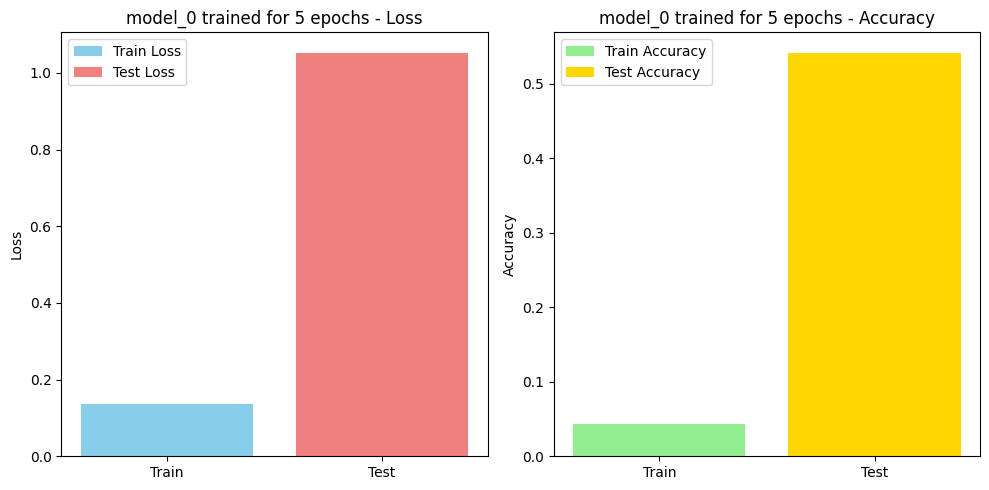

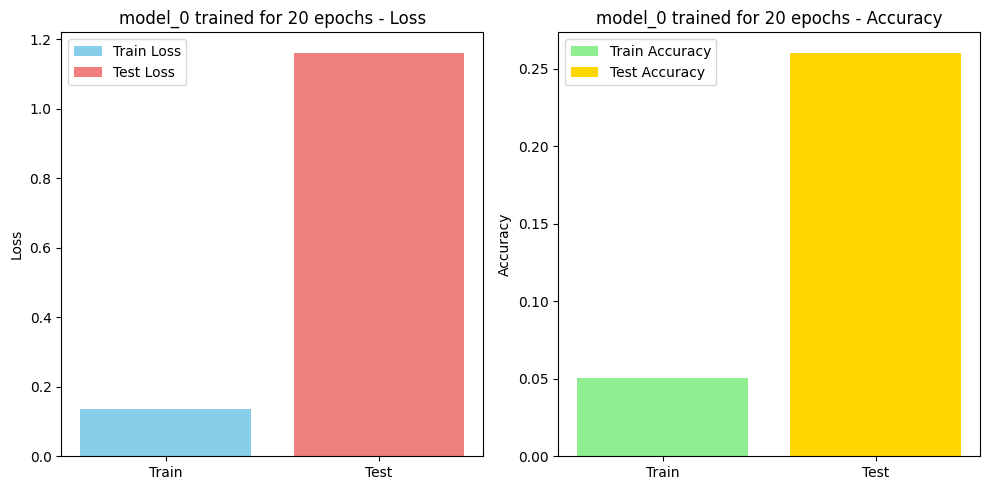

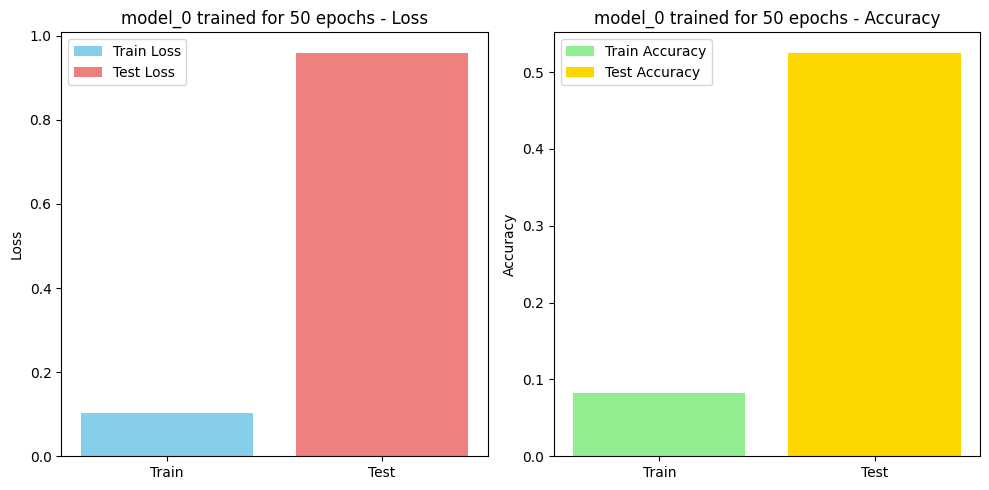

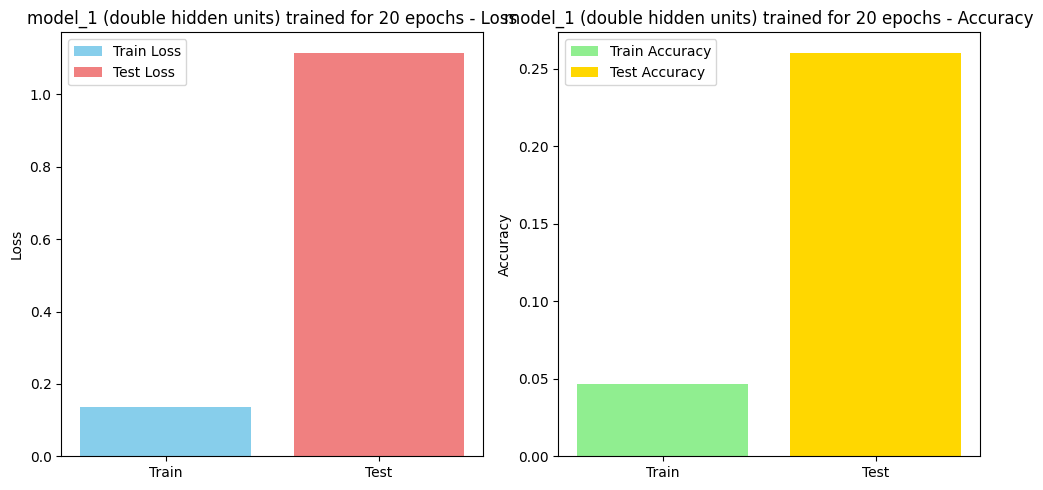

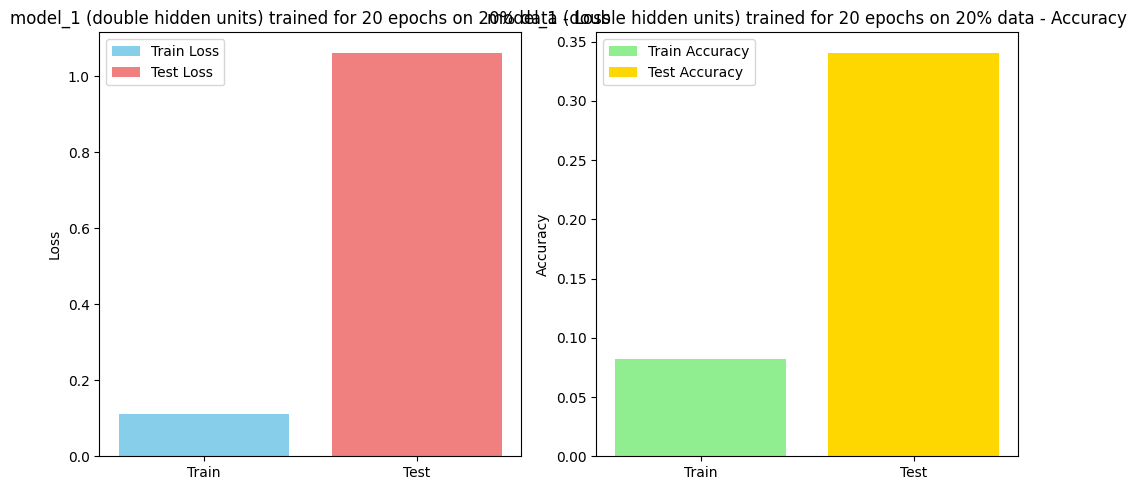

In [41]:
import matplotlib.pyplot as plt

# Data from the previous cell
model_names = [
    "model_0 trained for 5 epochs",
    "model_0 trained for 20 epochs",
    "model_0 trained for 50 epochs",
    "model_1 (double hidden units) trained for 20 epochs",
    "model_1 (double hidden units) trained for 20 epochs on 20% data"
]

train_loss = [results_0['train_loss'][-1], results_1['train_loss'][-1], results_2['train_loss'][-1], results_3['train_loss'][-1], results_4['train_loss'][-1]]
train_acc = [results_0['train_acc'][-1], results_1['train_acc'][-1], results_2['train_acc'][-1], results_3['train_acc'][-1], results_4['train_acc'][-1]]
test_loss = [results_0['test_loss'][-1], results_1['test_loss'][-1], results_2['test_loss'][-1], results_3['test_loss'][-1], results_4['test_loss'][-1]]
test_acc = [results_0['test_acc'][-1], results_1['test_acc'][-1], results_2['test_acc'][-1], results_3['test_acc'][-1], results_4['test_acc'][-1]]

# Plotting
for i in range(len(model_names)):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.bar(['Train'], [train_loss[i]], color='skyblue', label='Train Loss')
    plt.bar(['Test'], [test_loss[i]], color='lightcoral', label='Test Loss')
    plt.ylabel("Loss")
    plt.title(f"{model_names[i]} - Loss")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.bar(['Train'], [train_acc[i]], color='lightgreen', label='Train Accuracy')
    plt.bar(['Test'], [test_acc[i]], color='gold', label='Test Accuracy')
    plt.ylabel("Accuracy")
    plt.title(f"{model_names[i]} - Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()
